# Sales Prediction using Regression

In [3]:
#Supressing warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
#importing important lib
#lib for analysis
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix

#lib for visualisation
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#Reading the dataset 
advertising = pd.DataFrame(pd.read_csv('E:/Chrome Download/advertising (1).csv'))


# Exploratory Data Analysis

In [6]:
#data inspection
advertising.head()             #prints first 5 rows of dataset
advertising.info()             #provies data types of varibales
advertising.shape              #dimensions of dataset            
advertising.describe()         #basic EDA of datasets

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
#checking for null values
advertising.isnull().sum() 

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

Text(0.5, 1.0, 'Boxplot of Newspaper')

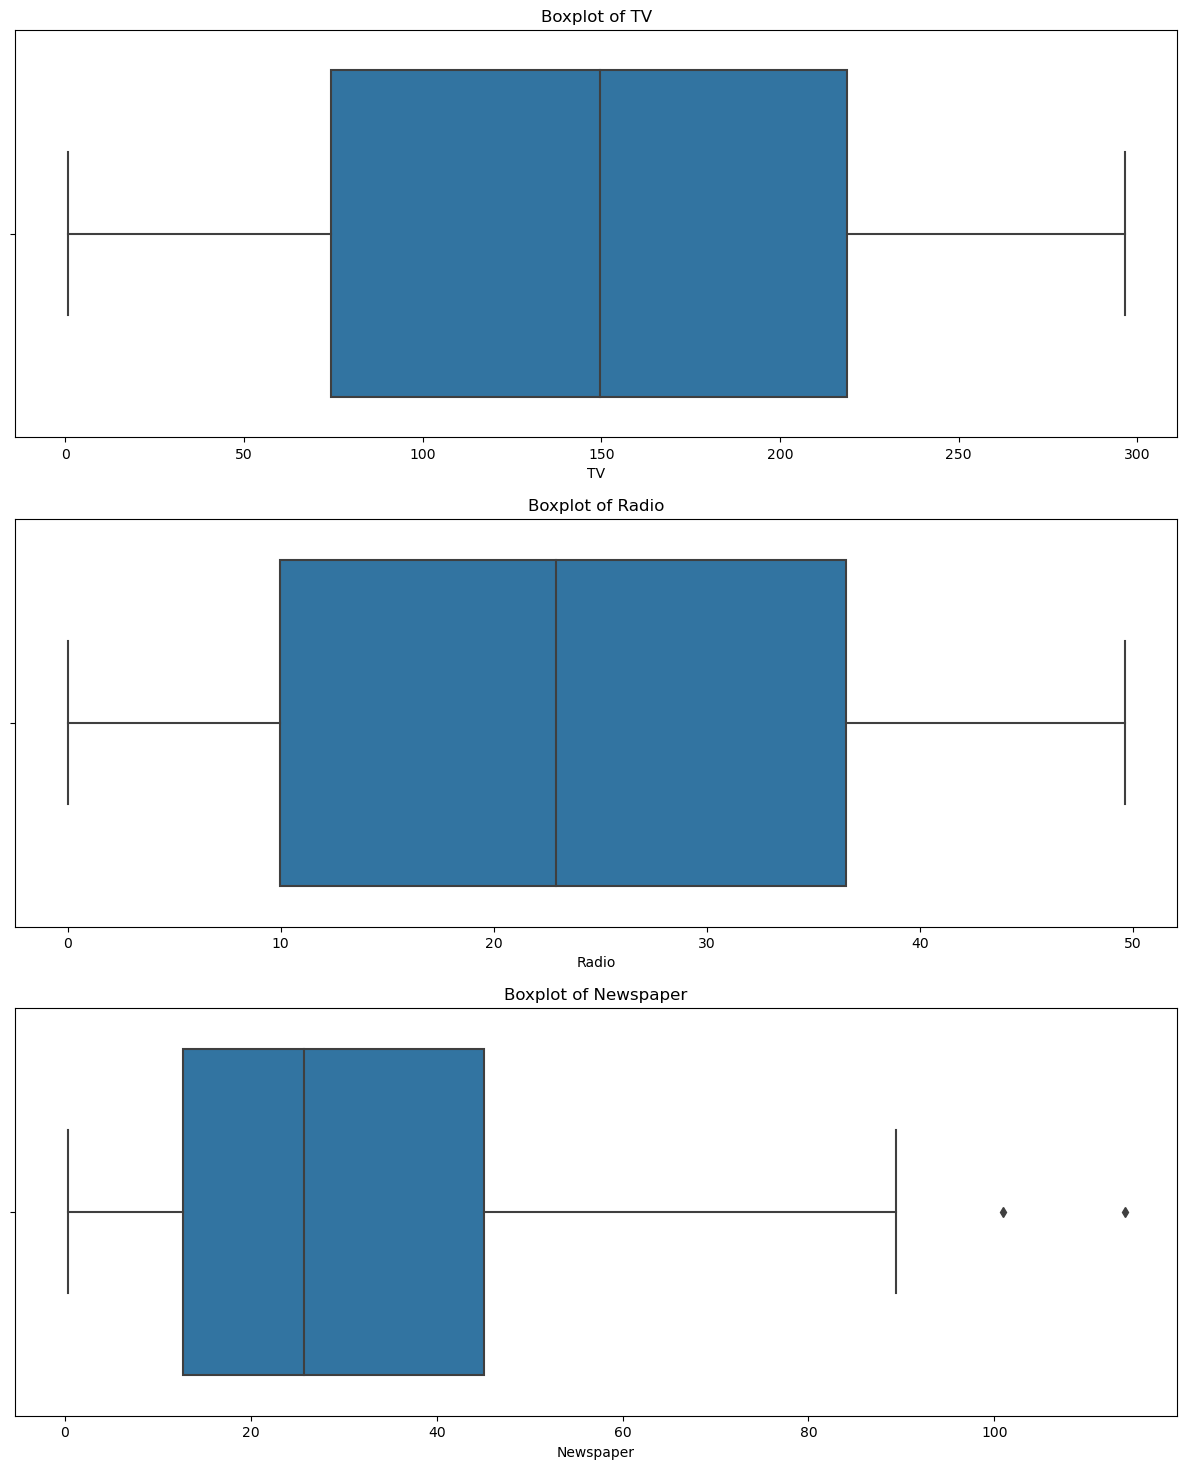

In [8]:
#Visual representation of variables
# outliars detection  

plt.figure(figsize=(15,18))


plt.subplot(3,1,1)
sns.boxplot(x=advertising['TV'])
plt.title("Boxplot of TV")


plt.subplot(3,1,2)
sns.boxplot(advertising['Radio'])
plt.title('Boxplot of Radio')


plt.subplot(3,1,3)
sns.boxplot(advertising['Newspaper'])
plt.title('Boxplot of Newspaper')

form the above scatter plot it can be said that there are no considerable outliers in data

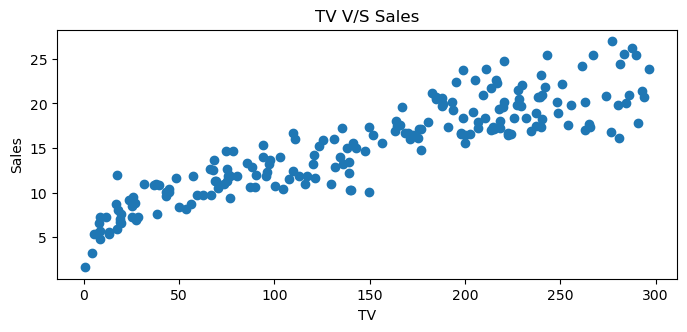

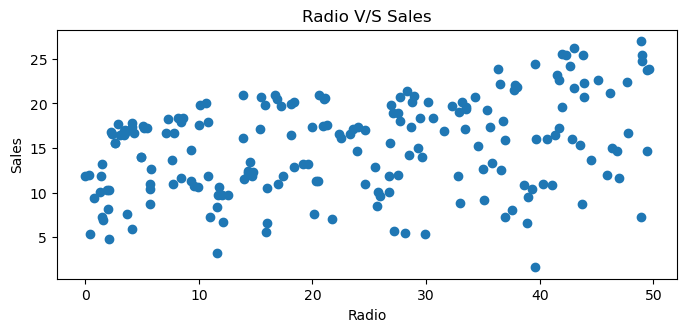

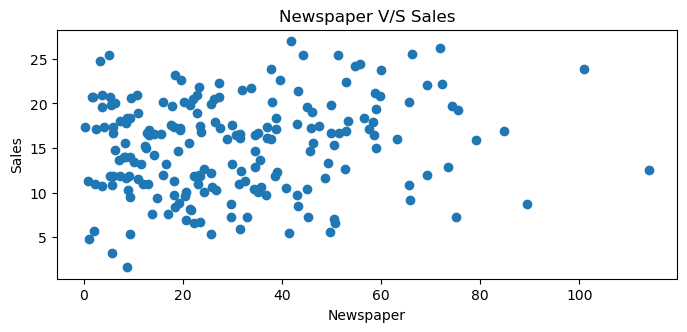

In [9]:
# plotting of Scatter plot

def scatter_p(x,y):
    plt.figure(figsize=(8,11)) 
    plt.subplot(3,1,y)
    plt.scatter(advertising[x],advertising['Sales'])
    plt.title(x+" V/S Sales")
    plt.ylabel("Sales")
    plt.xlabel(x)


scatter_p('TV',1)
scatter_p('Radio',2)
scatter_p('Newspaper',3)

 From the above scatter plot it can be seen that there is strong relationship between
 variable sales and variable TV

In [10]:
#correlation among variables
advertising.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


From the above matrix the correlation between variable TV and variable Sales is 0.901208

<AxesSubplot:>

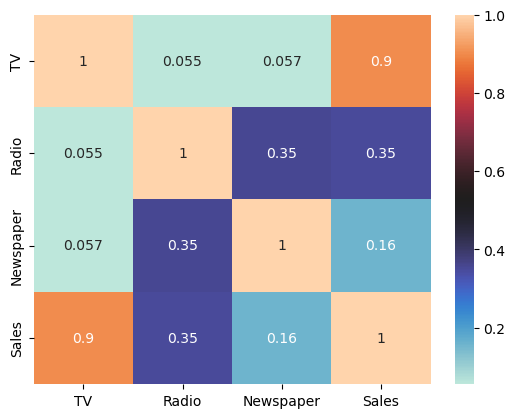

In [11]:
# plotting of heatmap
sns.heatmap(advertising.corr(),annot=True,cmap="icefire")

# Model building

In [12]:

y=advertising['Sales']
X=advertising['TV']


In [13]:
#splitting data into test and train
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

In [14]:
X_train.head()
y_train.head()

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
Name: Sales, dtype: float64

In [15]:
# Building linear model
import statsmodels.api as sm

In [16]:
# Add constant to get intercept
X_train_sm=sm.add_constant(X_train)

# fit regression line using OLS
lr = sm.OLS(y_train,X_train_sm).fit()

In [17]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Sat, 17 Jun 2023   Prob (F-statistic):           1.52e-52
Time:                        10:46:15   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

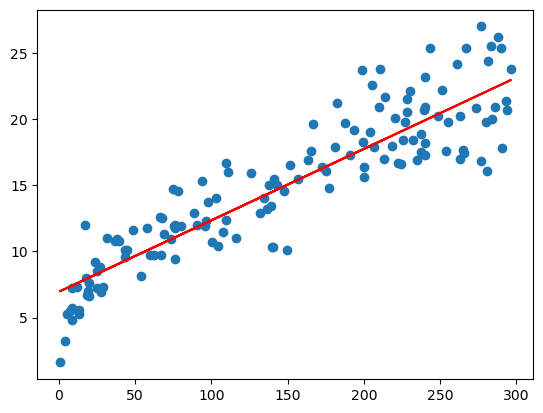

In [18]:
plt.scatter(X_train,y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

<AxesSubplot:ylabel='Density'>

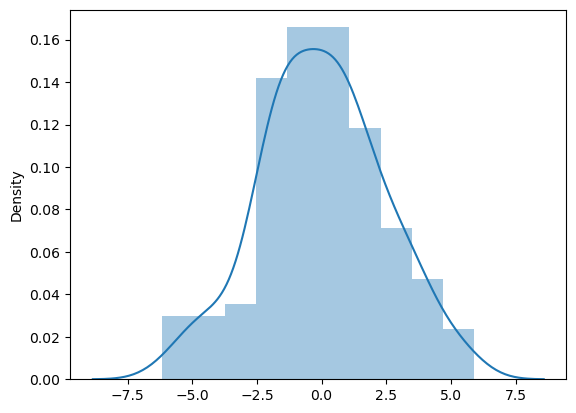

In [19]:
#Model evaluation
y_train_pred = lr.predict(X_train_sm)
res = (y_train-y_train_pred)

sns.distplot(res)

In [20]:
#prediction on test set
#adding constant to test data set
X_test_sm=sm.add_constant(X_test)
y_pred=lr.predict(X_test_sm)

In [21]:
y_pred.head()

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
dtype: float64

In [22]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
np.sqrt(mean_squared_error(y_test,y_pred))

2.019296008966233

In [23]:
#checking r squared on test
r_squared = r2_score(y_test,y_pred)
r_squared

0.7921031601245658

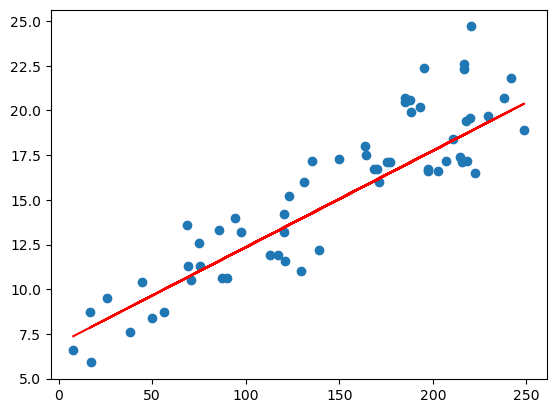

In [24]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')
plt.show()